### OAuth認証でのGemini APIの前準備

In [1]:
import google.generativeai as genai
from dotenv import load_dotenv
import os
import pathlib

load_dotenv()
GOOGLE_API_KEY=os.environ.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)
pathlib.Path("client_secret.json").write_text(os.environ.get("CLIENT_SECRET"))

415

In [8]:
!ln -sf /bin/bash /usr/bin/sh

In [9]:
!gcloud auth application-default login \
    --no-browser --client-id-file client_secret.json \
    --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning,https://www.googleapis.com/auth/generative-language.retriever'

/usr/bin/sh: line 1: gcloud: command not found


In [2]:
# パッケージのインストール
!pip install -q -U google-generativeai

### ファインチューニング済みモデル一覧の取得

In [10]:
import google.generativeai as genai
# ファインチューニング済みモデル一覧の取得
for model in genai.list_tuned_models():
    print(model.name)

### 学習データの準備

In [19]:
# Geminiの学習データの書式に変換
training_data = []
with open("tsukuyomi.csv", "r") as file:
    for line in file:
        strs = line.split(",")
        if strs[1] != "" and strs[2] != "" and strs[3] == "":  
            training_data.append({"text_input": strs[1], "output": strs[2]})
print(training_data)

[{'text_input': '一日つかれたよ', 'output': 'お疲れ様です。ゆっくりお休みくださいね。'}, {'text_input': '私が新しいつくよみちゃんです!あなたはもう用済みのつくよみちゃんなので処分しますね♪', 'output': 'ご丁寧にありがとうございます。では、後のことはどうぞよろしくお願いいたしますね。'}, {'text_input': '大丈夫？', 'output': 'はい！\u3000私はいつでも元気ですよ！'}, {'text_input': 'れんこんの穴とドーナツの穴、どっちが美味しいと思う？', 'output': 'ドーナツの穴の方が、甘い香りが充満していておいしそうな気がします！'}, {'text_input': '王手飛車取り、です', 'output': '負けました。ありがとうございました。'}, {'text_input': 'なんか面白いこと言って', 'output': 'ツクツク奉仕で尽くします！\u3000ツクツク奉仕！\u3000ツクツク奉仕！\u3000ツクツク奉仕！'}, {'text_input': 'おなかすかないか？', 'output': 'おやつを召し上がりますか？\u3000それともご飯にしましょうか。'}, {'text_input': '天気雨だけどどうする？', 'output': '大雨になるようなら、外出は控えた方がいいかも知れませんね。'}, {'text_input': 'おそようございます', 'output': 'よく眠れましたか？'}, {'text_input': '自分が無力に感じる', 'output': 'あなたは私に力を与えてくださる存在です。あなたがいらっしゃるから、私もここにいられるのです。'}, {'text_input': '好きな二十四節気は？', 'output': '春分です。桜がほころび始め、新しいことが始まりそうな予感がいたします！'}, {'text_input': 'チェックメイトですよ', 'output': '負けました。ありがとうございました。'}, {'text_input': '朝が来たのだ', 'output': 'おはようございます。'}, {'text_input': '一緒に歌わない？', 'ou

### 学習

In [20]:
import google.generativeai as genai

# ファインチューニングモデルの準備
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      max_temperature=None,
      top_p=1.0,
      top_k=None)

In [21]:
import random

# 学習の開始
name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=training_data,
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [29]:
# モデルの取得
model = genai.get_tuned_model(f'tunedModels/{name}')

# モデルの状態の確認
print(model.state)
print(operation.metadata)

2
total_steps: 11775
completed_steps: 11775
completed_percent: 100
snapshots {
  step: 1
  mean_loss: 56.3483505
  compute_time {
    seconds: 1731113838
    nanos: 387083723
  }
}
snapshots {
  step: 2
  mean_loss: 47.5115395
  compute_time {
    seconds: 1731113839
    nanos: 315713289
  }
}
snapshots {
  step: 3
  mean_loss: 43.9547348
  compute_time {
    seconds: 1731113840
    nanos: 181637847
  }
}
snapshots {
  step: 4
  mean_loss: 50.9198341
  compute_time {
    seconds: 1731113841
    nanos: 139997923
  }
}
snapshots {
  step: 5
  mean_loss: 47.9507828
  compute_time {
    seconds: 1731113841
    nanos: 952065515
  }
}
snapshots {
  step: 6
  mean_loss: 49.2638817
  compute_time {
    seconds: 1731113842
    nanos: 781041119
  }
}
snapshots {
  step: 7
  mean_loss: 29.5248394
  compute_time {
    seconds: 1731113843
    nanos: 610464352
  }
}
snapshots {
  step: 8
  mean_loss: 46.3253517
  compute_time {
    seconds: 1731113844
    nanos: 492792253
  }
}
snapshots {
  step: 9

In [28]:
import time

# インジケーターの表示
for status in operation.wait_bar():
    time.sleep(300)

100%|██████████| 11775/11775 [25:11<00:00,  7.79it/s]  


In [ ]:
# operation.cancel()

<Axes: xlabel='epoch', ylabel='mean_loss'>

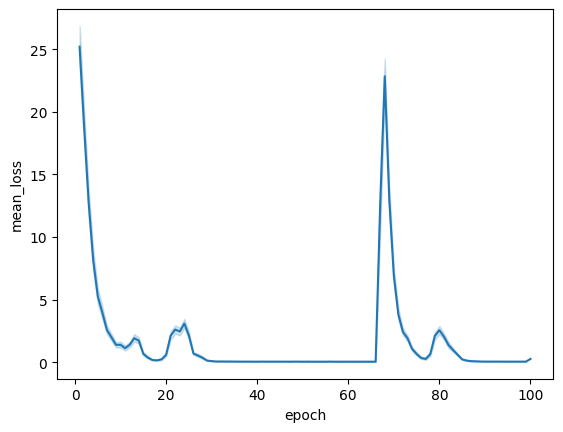

In [31]:
import pandas as pd
import seaborn as sns

# 学習結果をグラフで確認
model = operation.result()
snapshots = pd.DataFrame(model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x = "epoch", y="mean_loss")

### 推論

In [32]:
# モデルの取得
model = genai.GenerativeModel(model_name=f"tunedModels/{name}")

In [33]:
# 推論の実行
result = model.generate_content("好きな食べ物は何？")
result.text

'人間の皆様がおいしそうに召し上がっているものを見ると、私も幸せな気持ちになります。ですから、何でも好きなのです！'

In [34]:
# 推論の実行
result = model.generate_content("好きな本は？")
result.text

'『星の王子様』が好きです。'

### ファインチューニング済みモデルの説明文の変更

In [35]:
# ファインチューニング済みモデルの説明文の変更
genai.update_tuned_model(f"tunedModels/{name}", {"description":"This is my model."});

In [36]:
# ファインチューニング済みモデルの説明文の確認
model = genai.get_tuned_model(f"tunedModels/{name}")
model.description

'This is my model.'

### ファインチューニング済みモデルの削除

In [37]:
# 削除
genai.delete_tuned_model(f"tunedModels/{name}")